In [40]:
import numpy as np
import matplotlib.pyplot as plt 


In [41]:
array1=np.array([1,2,3,4,5])
array2=np.random.rand(3,3)
array3=np.zeros((4,4))


In [42]:
np.save('array1.npy',array1)
np.save('array2.npy',array2)
np.save('array3.npy',array3)

In [43]:
loaded_array1=np.load('array1.npy')
print("Loaded Array 1:",loaded_array1)

Loaded Array 1: [1 2 3 4 5]


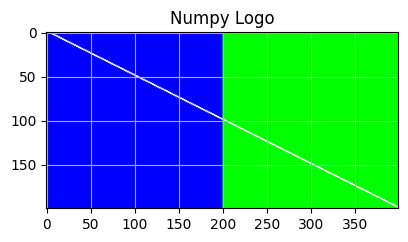

In [44]:
try:
    logo=np.load('numpy-logo.npy')
    #display the logo
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.imshow(logo)
    
    plt.title('Numpy Logo')
    plt.grid('off')
except FileNotFoundError:
    print("numpy logo not found")

In [45]:
# Diagnostic cell: inspect working dir and permissions for 'array1.npy'
import os, stat, pathlib, tempfile
import numpy as np

print('Working directory:', os.getcwd())
print('Working dir writable (os.access):', os.access(os.getcwd(), os.W_OK))

p = 'array1.npy'
print('\nTarget file:', p)
print('Exists:', os.path.exists(p))
if os.path.exists(p):
    st = pathlib.Path(p)
    print('Is file:', st.is_file())
    s = st.stat()
    print('stat:', s)
    print('mode (oct):', oct(s.st_mode))
    try:
        print('os.access writable:', os.access(p, os.W_OK))
    except Exception as e:
        print('os.access check failed:', e)

# Try a small open test
tmp = 'diag_write_test.tmp'
try:
    with open(tmp, 'wb') as f:
        f.write(b'ping')
    print('\nWrote temporary test file:', tmp)
    os.remove(tmp)
except Exception as e:
    print('\nFailed to write temp file:', repr(e))

# Try numpy save test to a different name
try:
    np.save('array1_test_write.npy', np.array([1,2,3]))
    print('np.save to array1_test_write.npy succeeded')
    os.remove('array1_test_write.npy')
except Exception as e:
    print('np.save test failed:', repr(e))

# If target exists and appears read-only, try to add write bit (best-effort)
if os.path.exists(p):
    try:
        current_mode = os.stat(p).st_mode
        os.chmod(p, current_mode | stat.S_IWRITE)
        print('\nTried os.chmod to add write permission')
        print('os.access writable after chmod:', os.access(p, os.W_OK))
    except Exception as e:
        print('\nchmod attempt failed:', repr(e))

print('\nDiagnostic cell finished')


Working directory: c:\Users\harsh\OneDrive\Desktop
Working dir writable (os.access): True

Target file: array1.npy
Exists: True
Is file: True
stat: os.stat_result(st_mode=33206, st_ino=16044073672817722, st_dev=10551063867166330611, st_nlink=1, st_uid=0, st_gid=0, st_size=168, st_atime=1761876299, st_mtime=1761876298, st_ctime=1761822303)
mode (oct): 0o100666
os.access writable: True

Wrote temporary test file: diag_write_test.tmp
np.save to array1_test_write.npy succeeded

Tried os.chmod to add write permission
os.access writable after chmod: True

Diagnostic cell finished
